In [1]:
import pandas as pd

df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [4]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled.shape

(768, 8)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y,stratify=y, test_size=0.2, random_state=10)

In [13]:
from sklearn import datasets

wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [16]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

X shape: (178, 13)
y shape: (178,)


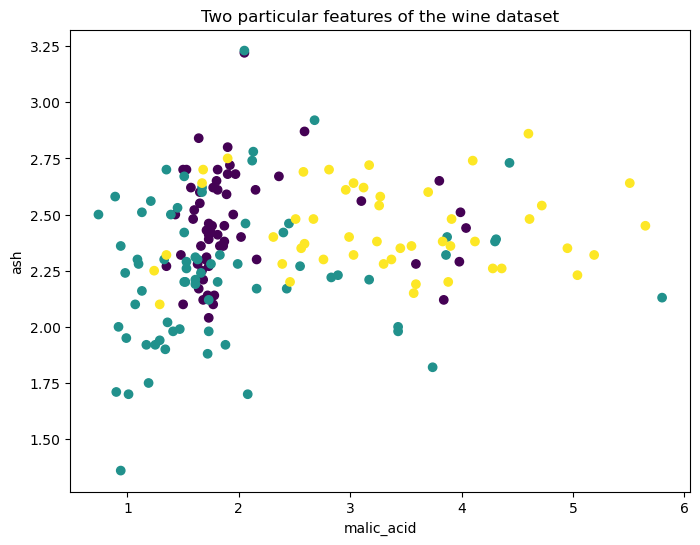

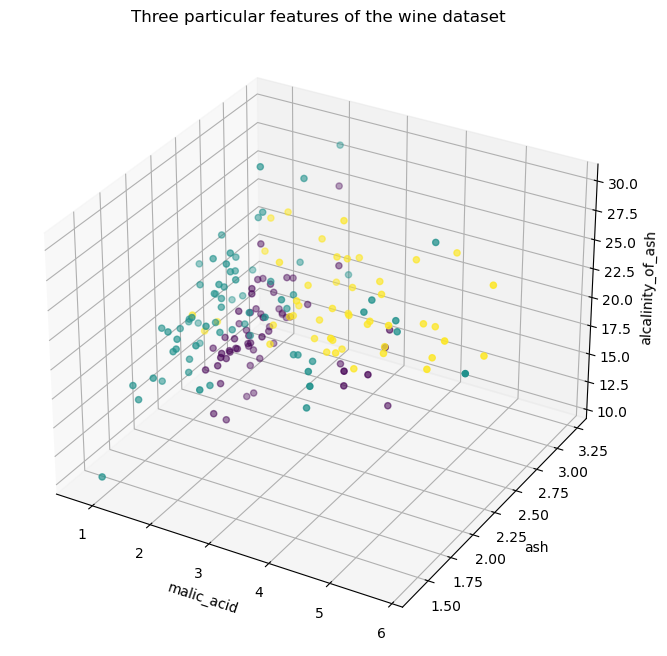

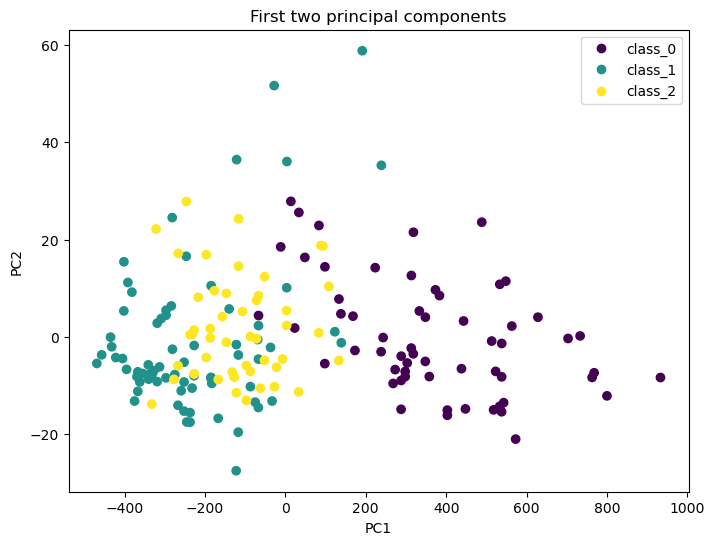

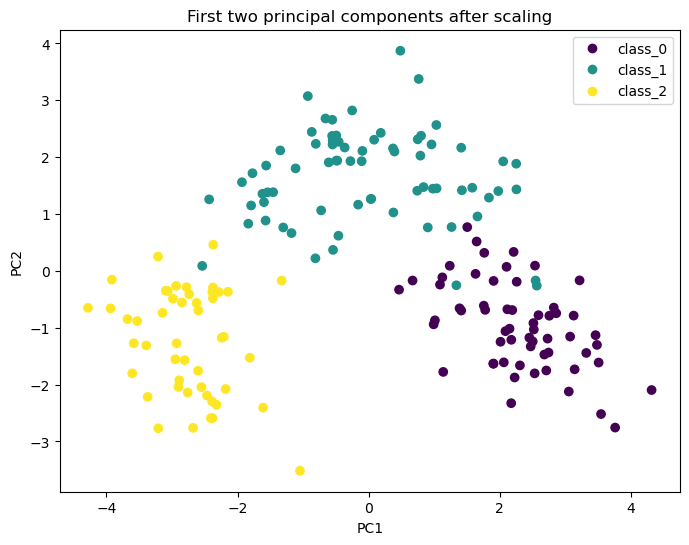

In [17]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load dataset
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print("X shape:", X.shape)
print("y shape:", y.shape)

# Show any two features
plt.figure(figsize=(8,6))
plt.scatter(X[:,1], X[:,2], c=y)
plt.xlabel(winedata["feature_names"][1])
plt.ylabel(winedata["feature_names"][2])
plt.title("Two particular features of the wine dataset")
plt.show()

# Show any three features
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], c=y)
ax.set_xlabel(winedata["feature_names"][1])
ax.set_ylabel(winedata["feature_names"][2])
ax.set_zlabel(winedata["feature_names"][3])
ax.set_title("Three particular features of the wine dataset")
plt.show()

# Show first two principal components without scaler
pca = PCA()
plt.figure(figsize=(8,6))
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

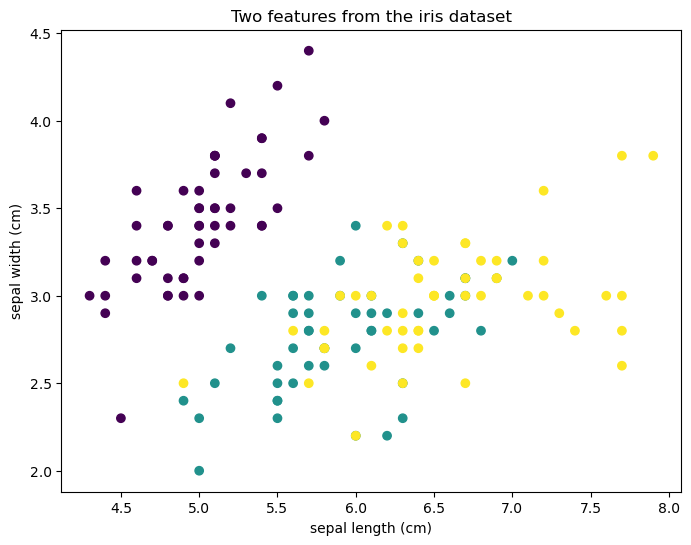

Principal components:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]


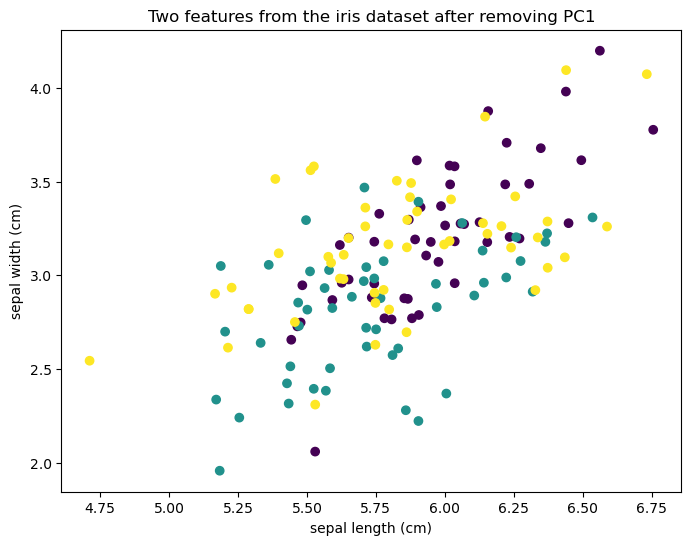

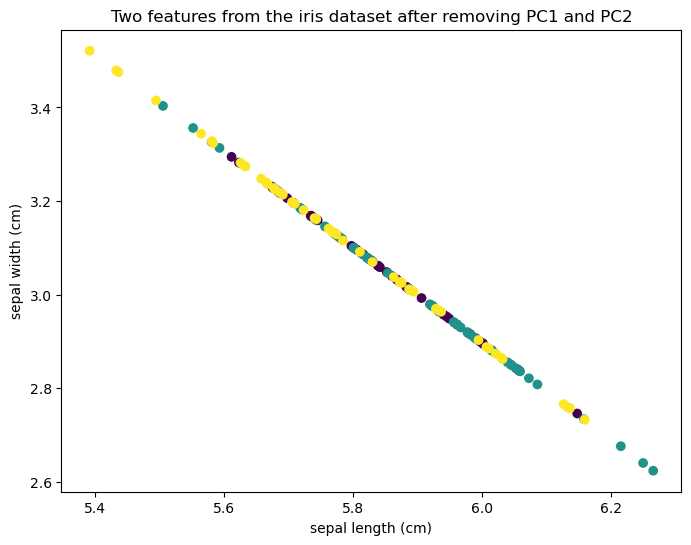

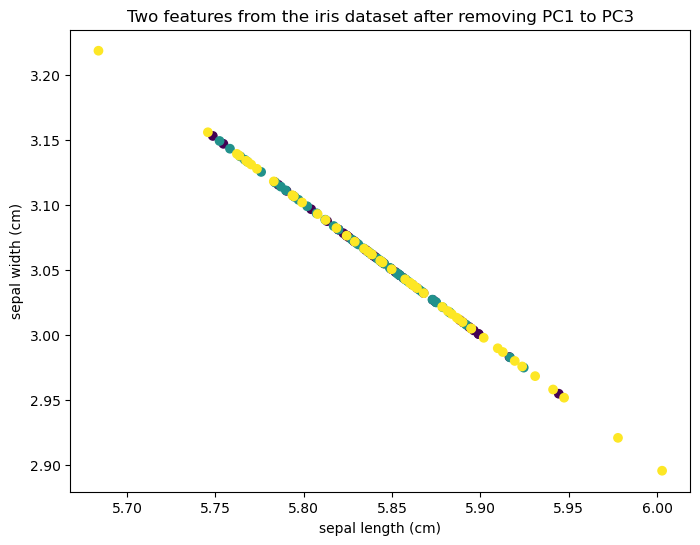

Explainedd variance ratios:
[0.92461872 0.05306648 0.01710261 0.00521218]
Using all features, accuracy:  0.94
Using all features, F1:  0.9499687304565354
Using PC1, accuracy:  0.86
Using PC1, F1:  0.8796475392220073


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load iris dataset
irisdata = load_iris()
X, y = irisdata['data'], irisdata['target']
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset")
plt.show()

# Show the principal components
pca = PCA().fit(X)
print("Principal components:")
print(pca.components_)

# Remove PC1
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[0]
pc1 = value.reshape(-1,1) @ pca.components_[0].reshape(1,-1)
Xremove = X - pc1
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1")
plt.show()

# Remove PC2
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[1]
pc2 = value.reshape(-1,1) @ pca.components_[1].reshape(1,-1)
Xremove = Xremove - pc2
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 and PC2")
plt.show()

# Remove PC3
Xmean = X - X.mean(axis=0)
value = Xmean @ pca.components_[2]
pc3 = value.reshape(-1,1) @ pca.components_[2].reshape(1,-1)
Xremove = Xremove - pc3
plt.figure(figsize=(8,6))
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.xlabel(irisdata["feature_names"][0])
plt.ylabel(irisdata["feature_names"][1])
plt.title("Two features from the iris dataset after removing PC1 to PC3")
plt.show()

# Print the explained variance ratio
print("Explainedd variance ratios:")
print(pca.explained_variance_ratio_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Run classifer on all features
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))

# Run classifier on PC1
mean = X_train.mean(axis=0)
X_train2 = X_train - mean
X_train2 = (X_train2 @ pca.components_[0]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train)
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))